# Wine Quality

in this project I want to predict the class of the wine based on its chemical properties. 

The wine dataset has three classes: 0, 1 and 2. Each class corresponds to a different cultivar of wine. The input to the ANN are thhe 13 chemical features of the wine, and the output is the predicted class of the wine.

To be more specific, the ANN predicts wheter a wine belongs to class 0, 1, or 2 based on its chemical properties.

Import the necessary libraries and import the wine dataset.

In [290]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

from sklearn.datasets import load_wine

wine = load_wine()

## Data Understanding

I will start with understanding the data.

In [291]:
# Show the dataset's keys
print(list(wine))

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names']


In [292]:
# Description of the dataset
print(wine['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [293]:
# Names of the 13 groups of data
print(wine['feature_names'])

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [294]:
# Names of the target data (ie the 3 wine cultivators)
print(wine['target_names'])

['class_0' 'class_1' 'class_2']


In [295]:
# The 178 data points in each of the 13 groups of data, formatted as a 150x13 array
print(wine['data'][:2])

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]]


In [296]:
# Which group each data point is in (0, 1 or 2)
print(wine['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


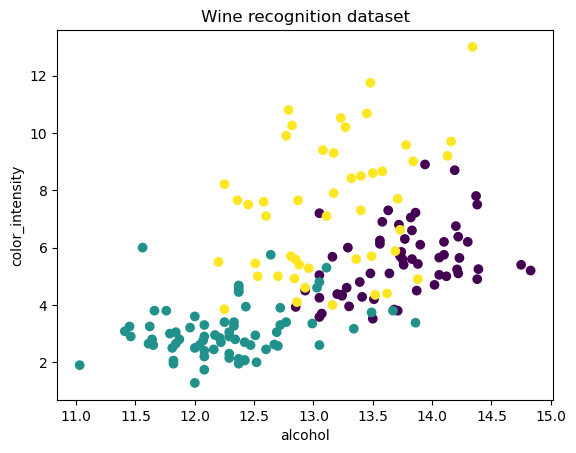

In [297]:
import matplotlib.pyplot as plt

# Plot
plt.scatter(wine['data'][:, 0], wine['data'][:, 9], c=wine['target'])
plt.title('Wine recognition dataset')
plt.xlabel(wine['feature_names'][0])
plt.ylabel(wine['feature_names'][9])
plt.show()

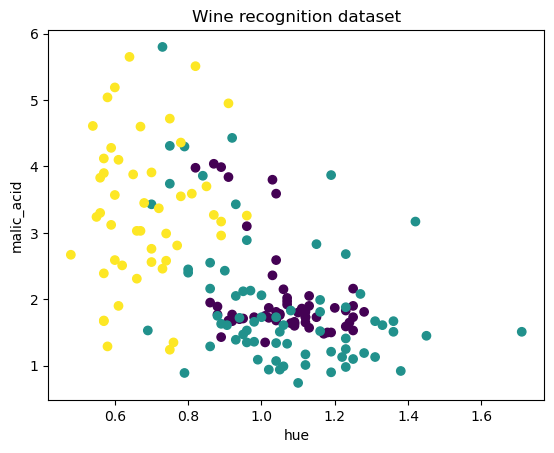

In [298]:
import pandas as pd

# Extract the data
data = pd.DataFrame(wine['data'], columns=wine['feature_names'])
# Extract the target
target = pd.DataFrame(wine['target'], columns=['cultivator'])
# Combine into one dataset
df = pd.concat([target, data], axis='columns')

# Plot
plt.scatter(df['hue'], df['malic_acid'], c=df['cultivator'])
plt.title('Wine recognition dataset')
plt.xlabel('hue')
plt.ylabel('malic_acid')
plt.show()

## Preprocessing the data

Now I will start with preprocessing the data. I will split the data in test and training data and I will use a StandardScaler to scale the data.

In [299]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model

Now I will define the model.

In [300]:
# Define the model architecture
model = Sequential()
# input layer. This layer should have 64 units (neurons). This means that 
# there will eb 64 weights to learn.
# The input shape is the number of features in the input layer. 
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
#This are the hidden layers
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
# This isthe final layer, the output layer. The purpose of this layer
# is to produce a binary classification output (0 or 1) based on the input data.
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


### Train the model

In [301]:
# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=50, verbose=1)


Epoch 1/50
5/5 [==============================] - 1s 3ms/step - loss: 0.8077 - accuracy: 0.2887
Epoch 2/50
5/5 [==============================] - 0s 2ms/step - loss: 0.4954 - accuracy: 0.5845
Epoch 3/50
5/5 [==============================] - 0s 2ms/step - loss: 0.2335 - accuracy: 0.6197
Epoch 4/50
5/5 [==============================] - 0s 3ms/step - loss: -0.0428 - accuracy: 0.6197
Epoch 5/50
5/5 [==============================] - 0s 4ms/step - loss: -0.3369 - accuracy: 0.6338
Epoch 6/50
5/5 [==============================] - 0s 2ms/step - loss: -0.7186 - accuracy: 0.6549
Epoch 7/50
5/5 [==============================] - 0s 2ms/step - loss: -1.1448 - accuracy: 0.6831
Epoch 8/50
5/5 [==============================] - 0s 3ms/step - loss: -1.7784 - accuracy: 0.6831
Epoch 9/50
5/5 [==============================] - 0s 2ms/step - loss: -2.5369 - accuracy: 0.6831
Epoch 10/50
5/5 [==============================] - 0s 2ms/step - loss: -3.6231 - accuracy: 0.6831
Epoch 11/50
5/5 [===============

### Evaluate the model

In [302]:
# Evaluate the model on the testing data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)


Test accuracy: 0.75
Test loss: -6613.85498046875


In [303]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Use the trained model to make predictions on the test set
y_pred = model.predict(X_test)

# Convert the probabilities to binary values using a threshold of 0.5
y_pred = y_pred.round()

# Compute the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
confusion = confusion_matrix(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)
print('Confusion matrix:\n', confusion)


2/2 [==============================] - 0s 5ms/step
Accuracy: 0.75
Precision: 0.6256038647342995
Recall: 0.75
F1 score: 0.6687798910021132
Confusion matrix:
 [[13  1  0]
 [ 0 14  0]
 [ 0  8  0]]


c:\Users\heath\Anaconda3\envs\chessEnv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


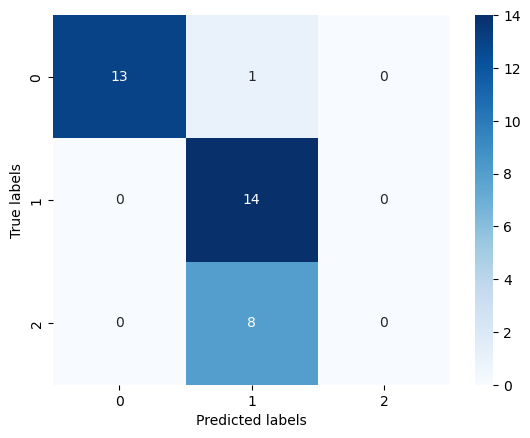

In [305]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the confusion matrix as a heatmap
sns.heatmap(confusion, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


## Visualizing

To see if my model has underfitting or overfitting, I plot the losses and accuracy in a table

Epoch 1/50
5/5 [==============================] - 0s 16ms/step - loss: -8678.5371 - accuracy: 0.6972 - val_loss: -7255.2197 - val_accuracy: 0.7222
Epoch 2/50
5/5 [==============================] - 0s 8ms/step - loss: -9479.9668 - accuracy: 0.6831 - val_loss: -7973.5200 - val_accuracy: 0.7222
Epoch 3/50
5/5 [==============================] - 0s 9ms/step - loss: -10391.0498 - accuracy: 0.6901 - val_loss: -8743.8555 - val_accuracy: 0.7500
Epoch 4/50
5/5 [==============================] - 0s 11ms/step - loss: -11349.8652 - accuracy: 0.6901 - val_loss: -9558.1982 - val_accuracy: 0.7500
Epoch 5/50
5/5 [==============================] - 0s 9ms/step - loss: -12518.9561 - accuracy: 0.6901 - val_loss: -10400.0166 - val_accuracy: 0.7500
Epoch 6/50
5/5 [==============================] - 0s 9ms/step - loss: -13593.7002 - accuracy: 0.7042 - val_loss: -11344.2383 - val_accuracy: 0.7500
Epoch 7/50
5/5 [==============================] - 0s 9ms/step - loss: -14846.4297 - accuracy: 0.6972 - val_loss: -12

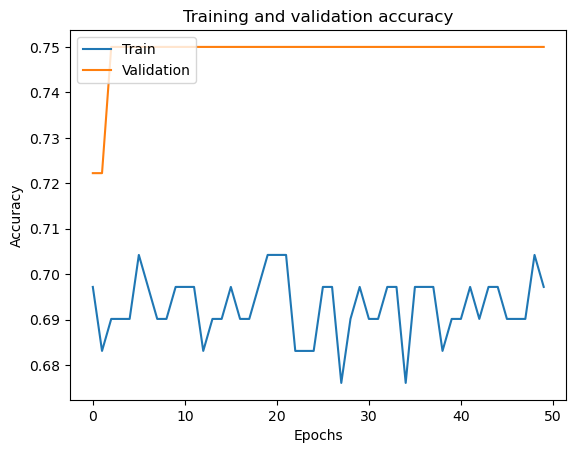

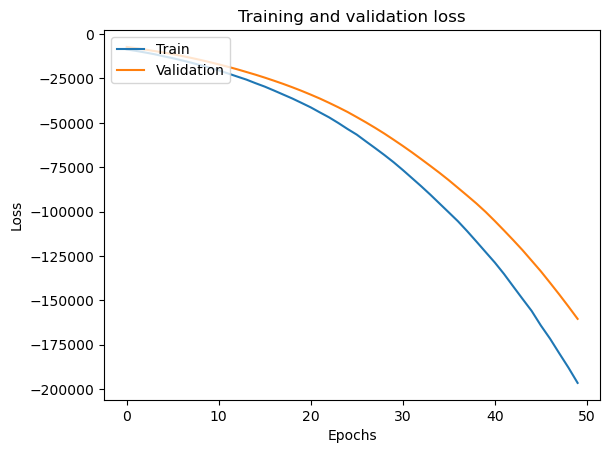

In [306]:
# Train the model and obtain the history object
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

# Plot the training and validation accuracy versus epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss versus epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Considering the validation accuracy is a lot higher than the training accuracy, I think the model is underfitting. I think I need more data to get a better accuracy score.

# improving the model

the model has a score of 77 percent. This is not very good. You can also see in the heatmap above that label 2 scores very poorly. I am now going to try to get this score better by tuning the parameters.

##### Number of hidden layers and neurons

The number of hidden layers and the number of neurons in each layer can greatly affect the performance of the neural network. 

In [307]:
# Define the model architecture
model = Sequential() 
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=50, verbose=1)

Epoch 1/50
5/5 [==============================] - 1s 3ms/step - loss: 0.5002 - accuracy: 0.4085
Epoch 2/50
5/5 [==============================] - 0s 2ms/step - loss: 0.1766 - accuracy: 0.4014
Epoch 3/50
5/5 [==============================] - 0s 2ms/step - loss: -0.2654 - accuracy: 0.5070
Epoch 4/50
5/5 [==============================] - 0s 3ms/step - loss: -0.7841 - accuracy: 0.5704
Epoch 5/50
5/5 [==============================] - 0s 3ms/step - loss: -1.5279 - accuracy: 0.6408
Epoch 6/50
5/5 [==============================] - 0s 3ms/step - loss: -2.6612 - accuracy: 0.6479
Epoch 7/50
5/5 [==============================] - 0s 3ms/step - loss: -4.4260 - accuracy: 0.6620
Epoch 8/50
5/5 [==============================] - 0s 3ms/step - loss: -7.0908 - accuracy: 0.6831
Epoch 9/50
5/5 [==============================] - 0s 3ms/step - loss: -11.5412 - accuracy: 0.6901
Epoch 10/50
5/5 [==============================] - 0s 3ms/step - loss: -18.9447 - accuracy: 0.6831
Epoch 11/50
5/5 [============

In [308]:
# Evaluate the model on the testing data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)


Test accuracy: 0.7777777910232544
Test loss: -206273.8125


In this case, adding an extra hidden layer is decreasing the accuracy.

#### Changing the neurons

In [309]:
# Define the model architecture
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=50, verbose=1)

Epoch 1/50
5/5 [==============================] - 1s 3ms/step - loss: 0.7151 - accuracy: 0.4507
Epoch 2/50
5/5 [==============================] - 0s 2ms/step - loss: 0.5386 - accuracy: 0.5493
Epoch 3/50
5/5 [==============================] - 0s 2ms/step - loss: 0.3680 - accuracy: 0.5634
Epoch 4/50
5/5 [==============================] - 0s 2ms/step - loss: 0.2148 - accuracy: 0.5634
Epoch 5/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0348 - accuracy: 0.5634
Epoch 6/50
5/5 [==============================] - 0s 2ms/step - loss: -0.1516 - accuracy: 0.5775
Epoch 7/50
5/5 [==============================] - 0s 2ms/step - loss: -0.3519 - accuracy: 0.6056
Epoch 8/50
5/5 [==============================] - 0s 2ms/step - loss: -0.6156 - accuracy: 0.6268
Epoch 9/50
5/5 [==============================] - 0s 2ms/step - loss: -0.8962 - accuracy: 0.6268
Epoch 10/50
5/5 [==============================] - 0s 2ms/step - loss: -1.2771 - accuracy: 0.6549
Epoch 11/50
5/5 [=================

In [310]:
# Evaluate the model on the testing data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

Test accuracy: 0.7777777910232544
Test loss: -1102.552001953125


Also in this case, the accuracy decreases

#### changing the optimizer

In [311]:
# Define the model architecture
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=50, verbose=1)

Epoch 1/50
5/5 [==============================] - 1s 2ms/step - loss: 0.3991 - accuracy: 0.3944
Epoch 2/50
5/5 [==============================] - 0s 2ms/step - loss: 0.2221 - accuracy: 0.4014
Epoch 3/50
5/5 [==============================] - 0s 3ms/step - loss: 0.0243 - accuracy: 0.4014
Epoch 4/50
5/5 [==============================] - 0s 2ms/step - loss: -0.1740 - accuracy: 0.4014
Epoch 5/50
5/5 [==============================] - 0s 2ms/step - loss: -0.4118 - accuracy: 0.4014
Epoch 6/50
5/5 [==============================] - 0s 2ms/step - loss: -0.6938 - accuracy: 0.4014
Epoch 7/50
5/5 [==============================] - 0s 5ms/step - loss: -1.0273 - accuracy: 0.4014
Epoch 8/50
5/5 [==============================] - 0s 4ms/step - loss: -1.5096 - accuracy: 0.4014
Epoch 9/50
5/5 [==============================] - 0s 3ms/step - loss: -2.2310 - accuracy: 0.4014
Epoch 10/50
5/5 [==============================] - 0s 3ms/step - loss: -3.3699 - accuracy: 0.4014
Epoch 11/50
5/5 [===============

In [312]:
# Evaluate the model on the testing data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

Test accuracy: 0.3888888955116272
Test loss: nan


# Conclusion

The values I initially applied to the model appear to give the highest score. 

As I also wrote earlier, I think this model is underfitting. 
If you look at the heatmap you will see that it has predicted only 14 wines for label 1. This is not enough to train a model. 

I personally like it better to use a dataset from kaggle, for example, because you can visualize it better. 